# Wine Clustering

As a new business, we only have a certain amount of grapes to produce new wine. Using this data set, we would like to know what types of wines were rated best (and with a good price) in specific areas. From the new information we gather, we want to predict the cost of the new wine that would be on the market based on the price of similar types of wine.


As a consumer new to drinking wine, we want to know what types of wine were rated best for a given province and year. That way, when we are looking at bottles of wines in stores, we would know whether a specific bottle had high ratings. 


In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture

import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
# Load the cleaned data into dataframe

""" 
    Information of cleaned dataset:
    
    - Province and Variety of wine is transfomed from a categorical attribute to numerical attribute
    - Vintage of wine is extracted from the title of each wine
    - Rows were removed if there were null values present within each of the three attributes (Province, Variety, Vintage)
    - Dataset size was reduced from 125,000 rows to 22,000 rows
    
"""
warnings.simplefilter('ignore')
data = pd.read_csv("../data/3column_clean.csv")
data.dropna(subset = ['points', 'price'], inplace = True)
print(data.shape)
data.head()

(116591, 17)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,1,450,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2,436,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,3,479,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,440,2012
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,4,590,2011


In [3]:
variety_dict = dict()

for index, row in data.iterrows():
    if row['variety_numerical'] not in variety_dict:
        variety_dict[row['variety_numerical']] = row['variety']       

In [4]:
province_dict = dict()

for index, row in data.iterrows():
    if row['province_id'] not in province_dict:
        province_dict[row['province_id']] = row['province'] 

In [5]:
# Helper function to count the number of samples in each cluster

def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

In [6]:
# Helper function to get the top x in col from data from each cluster

# example usage: get_top_x_per_cluster(x, 'points', data, labels, n)
# x = the top number 'x' from each cluster
# col = the column with an attribute about the dataset
# data = the dataframe with the entire datset
# clusters = the clusters of each point
# n = the number of clusters formed using for k-means

def get_top_x_per_cluster(x, col, data, clusters, n):
    top_lists = [dict() for i in range(n)]
    c = 0
    
    for index, row in data.iterrows():
        i = clusters[c]
        c += 1
        if row[col] in top_lists[i]:
            top_lists[i][row[col]] += 1
        else:
             top_lists[i][row[col]] = 1
    
    print('\nTop', x, col, 'in each cluster')
    for i in range(n):
        print('\nCluster ', i)
        sorted_list = sorted(top_lists[i].items(), key=lambda kv: kv[1])
        sorted_list = list(reversed(sorted_list))
        for y in range(x):
            if(y < len(sorted_list)):
                print(sorted_list[y])
    return
    

In [7]:
#helper function to find values after being normalized
def unnormalize(x, col, data):
    return int(x * data.loc[:,col].max() + data.loc[:,col].min())

In [8]:
# Extract data for clustering and analysis 

clustering_data = data.loc[:,['province_id','variety_numerical','vintage']]
clustering_data.head()

,province_id,variety_numerical,vintage
1,1,450,2011
2,2,436,2013
3,3,479,2013
4,2,440,2012
5,4,590,2011


In [9]:
# Set n=8 for GMM
# n is taken from elbow method when applying k-means clustering
n = 8

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_data)
labels = gmm.predict(clustering_data)

print("\n\nClusters:")
label_count(labels)
#data.loc[:,['province_id','variety_numerical','vintage']]




Clusters:
{0: 9998, 1: 28094, 2: 10, 3: 5899, 4: 175, 5: 21055, 6: 28076, 7: 23284}


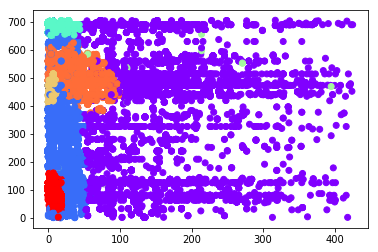

In [10]:
# Plot for the original 1st pass of GMM clustering using raw data

plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

In [11]:
# Get top 3 province ids from each cluster formed
get_top_x_per_cluster(3, 'province', data, labels, n)

# Get top 3 varieties from each cluster formed
get_top_x_per_cluster(3, 'variety', data, labels, n)

# Get top 3 vintage from each cluster formed
get_top_x_per_cluster(3, 'vintage', data, labels, n)

('\nTop', 3, 'province', 'in each cluster')
('\nCluster ', 0)
('Loire Valley', 639)
('Nieder\xc3\xb6sterreich', 327)
('Levante', 305)
('\nCluster ', 1)
('California', 4197)
('Piedmont', 2959)
('Burgundy', 2506)
('\nCluster ', 2)
('California', 10)
('\nCluster ', 3)
('California', 3253)
('Northern Spain', 393)
('Washington', 334)
('\nCluster ', 4)
('Port', 24)
('Tuscany', 22)
('California', 17)
('\nCluster ', 5)
('California', 12718)
('Oregon', 3659)
('Alsace', 1285)
('\nCluster ', 6)
('Tuscany', 3952)
('Washington', 2882)
('California', 2664)
('\nCluster ', 7)
('California', 12576)
('Bordeaux', 3677)
('Washington', 3057)
('\nTop', 3, 'variety', 'in each cluster')
('\nCluster ', 0)
('Gr\xc3\xbcner Veltliner', 992)
('Chardonnay', 869)
('Cabernet Sauvignon', 527)
('\nCluster ', 1)
('Chardonnay', 3064)
('Merlot', 2810)
('Malbec', 2521)
('\nCluster ', 2)
('Cabernet Sauvignon', 6)
('Bordeaux-style Red Blend', 3)
('Sauvignon Blanc', 1)
('\nCluster ', 3)
('Zinfandel', 2507)
('White Blend', 158

# Analysis - Applying GMM without Data Normalization

We applied the GMM algorithm based on the province, variety and vintage of each wine without normalizing the dataset (province, variety, vintage). Within the top clusters for province, the resulting clusters returned California in 7 out of 8 of these clusters. This is because California is the most popular province in this dataset with 36247 entries, approximately 28% of our dataset. In addition, we also see that several vintages were spread across different clusters because there was only a few different vintages compared to the amount of samples. For example, wines with vintage of 2013 were in 6 out of 8 of the clusters. The clusters formed based on the top varieties did have different types of wines within each of the clusters. 

The scatter plot with n=8 using the GMM algorithm shows that there are some provinces with many different types of wines. It also showed that outside some of the smaller clusters formed, the biggest cluster had all different types of wines coming from many different provinces. This is representative of what is seen from the clusters because the dataset had more data than other provinces.

In [12]:
# Normalizing province id between 1 and 0 
data['norm_province_id'] = abs((data.province_id - data.province_id.min()) / (data.province_id.max()))

In [13]:
# Normalizing variety (numerical) between 1 and 0 
data['norm_variety_numerical'] = abs((data.variety_numerical - data.variety_numerical.min()) / (data.variety_numerical.max()))

In [14]:
# Normalizing province id between 1 and 0 
data['norm_vintage'] = abs((data.vintage - data.vintage.min()) / (data.vintage.max()))

In [15]:
# Normalizing price between 1 and 0 
data['norm_price'] = abs((data.price - data.price.min()) / (data.price.max()))

In [16]:
# Normalizing points(rating) between 1 and 0 
data['norm_points'] = abs((data.points - data.points.min()) / (data.points.max()))

In [17]:
# Gathering normalized data to prepare for clustering
# 2nd pass at GMM clustering using the normalized data instead of non normalized data to help with outliers
clustering_norm_data = data.loc[:,['norm_province_id','norm_variety_numerical']]
clustering_norm_data.head()

,norm_province_id,norm_variety_numerical
1,0.002353,0.638810
2,0.004706,0.618980
3,0.007059,0.679887
4,0.004706,0.624646
5,0.009412,0.837110


In [18]:
# generating the GMM clusters and setting n = 4 based on elbow method from K-means
n = 4

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_norm_data)
labels = gmm.predict(clustering_norm_data)

print("\n\nClusters:")
label_count(labels)
#data.loc[:,['province_id','variety_numerical','vintage']]



Clusters:
{0: 31852, 1: 29715, 2: 33075, 3: 21949}


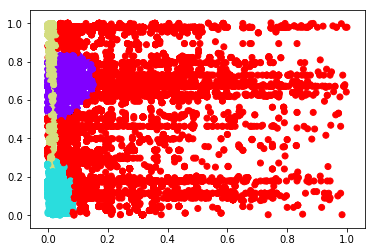

In [19]:
# Scatter plot of the normalized k-means clustering of points and price
plt.scatter(data.loc[:,'norm_province_id'], data.loc[:,'norm_variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

In [20]:
# Get top 3 province ids from each cluster formed
get_top_x_per_cluster(3, 'province', data, labels, n)

# Get top 3 varieties from each cluster formed
get_top_x_per_cluster(3, 'variety', data, labels, n)

# Get top 3 vintage from each cluster formed
get_top_x_per_cluster(3, 'vintage', data, labels, n)

('\nTop', 3, 'province', 'in each cluster')
('\nCluster ', 0)
('Tuscany', 4584)
('Oregon', 3833)
('Washington', 3731)
('\nCluster ', 1)
('California', 12752)
('Bordeaux', 3678)
('Washington', 3168)
('\nCluster ', 2)
('California', 22683)
('Northern Spain', 3700)
('Mendoza Province', 1919)
('\nCluster ', 3)
('Washington', 1610)
('Loire Valley', 1536)
('Veneto', 1126)
('\nTop', 3, 'variety', 'in each cluster')
('\nCluster ', 0)
('Red Blend', 5634)
('Pinot Noir', 4790)
('Ros\xc3\xa9', 2231)
('\nCluster ', 1)
('Chardonnay', 9490)
('Cabernet Sauvignon', 8641)
('Bordeaux-style Red Blend', 5041)
('\nCluster ', 2)
('Pinot Noir', 7079)
('Zinfandel', 2623)
('Syrah', 2109)
('\nCluster ', 3)
('Merlot', 1506)
('Chardonnay', 1319)
('White Blend', 1316)
('\nTop', 3, 'vintage', 'in each cluster')
('\nCluster ', 0)
(2012, 4068)
(2014, 3867)
(2013, 3844)
('\nCluster ', 1)
(2014, 3991)
(2013, 3952)
(2012, 3770)
('\nCluster ', 2)
(2013, 4862)
(2012, 4475)
(2014, 4194)
('\nCluster ', 3)
(2014, 2794)
(2013,

# Analysis - GMM with Normalized Data

After applying the GMM algorithm with k=4 (from the elbow method with k-means) and our normalized dataset, the scatter plot shows that more distinct clusters were formed. It shows that certain provinces countained more specific varieties of wine. Similar to the scatter plot utilizing GMM on our unnormalized data, the plot also shows that there are still some specific provinces producing a larger varitety of wine. Even after using the normalized dataset to apply GMM, the cluster analysis still shows the same provinces in different clusters and the same vintages spread across different clusters. Although the data has been normalized, the volume of specific provinces (such as Washington and California) do not change.

In [21]:
filtered_data = data.query('variety == "Chardonnay"')
filtered_data = filtered_data.query('vintage <= 2018 and vintage >= 1900')



clustering_norm_data = filtered_data.loc[:,['norm_vintage', 'norm_points', 'norm_price']]
print(filtered_data.shape)
clustering_norm_data.head()

(10808, 22)


,norm_vintage,norm_points,norm_price
14,0.119722,0.07,0.002424
55,0.119444,0.05,0.007879
56,0.119444,0.05,0.003030
64,0.120139,0.06,0.006061
65,0.120139,0.06,0.003333


In [22]:
# generating the GMM clusters and setting n = 4 based on elbow method from K-means
n = 5

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_norm_data)
labels = gmm.predict(clustering_norm_data)

print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 3421, 1: 4818, 2: 272, 3: 440, 4: 1857}


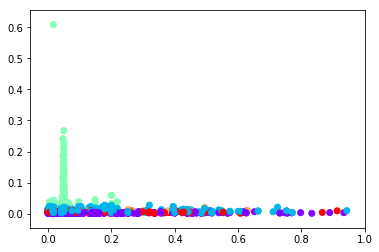

In [23]:
# Scatter plot of the normalized k-means clustering of points and price
plt.scatter(filtered_data.loc[:,'norm_province_id'], filtered_data.loc[:,'norm_price'], c=labels, cmap='rainbow')    
plt.show()

In [24]:
# Get top 3 varieties from each cluster formed
get_top_x_per_cluster(3, 'price', filtered_data, labels, n)

# Get top 3 vintage from each cluster formed
get_top_x_per_cluster(3, 'province', filtered_data, labels, n)

('\nTop', 3, 'price', 'in each cluster')
('\nCluster ', 0)
(15.0, 382)
(12.0, 308)
(10.0, 306)
('\nCluster ', 1)
(45.0, 313)
(40.0, 306)
(30.0, 287)
('\nCluster ', 2)
(100.0, 19)
(125.0, 14)
(115.0, 12)
('\nCluster ', 3)
(35.0, 64)
(45.0, 53)
(30.0, 49)
('\nCluster ', 4)
(20.0, 221)
(30.0, 203)
(25.0, 180)
('\nTop', 3, 'province', 'in each cluster')
('\nCluster ', 0)
('California', 1318)
('Burgundy', 304)
('Washington', 205)
('\nCluster ', 1)
('California', 2652)
('Burgundy', 877)
('Oregon', 316)
('\nCluster ', 2)
('Burgundy', 195)
('Champagne', 39)
('California', 16)
('\nCluster ', 3)
('California', 307)
('Burgundy', 70)
('Oregon', 8)
('\nCluster ', 4)
('California', 840)
('Burgundy', 338)
('Washington', 139)


(3043, 22)


Clusters:
{0: 1189, 1: 811, 2: 194, 3: 820, 4: 29}


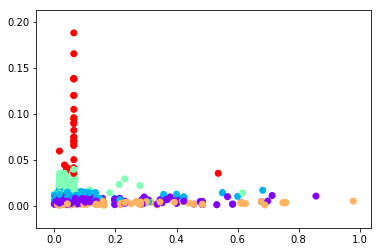

In [25]:
filtered_data = data.query('variety == "Merlot"')
filtered_data = filtered_data.query('vintage <= 2018 and vintage >= 1900')



clustering_norm_data = filtered_data.loc[:,['norm_vintage', 'norm_points', 'norm_price']]
print(filtered_data.shape)
clustering_norm_data.head()

# generating the GMM clusters and setting n = 4 based on elbow method from K-means
n = 5

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_norm_data)
labels = gmm.predict(clustering_norm_data)

print("\n\nClusters:")
label_count(labels)

# Scatter plot of the normalized k-means clustering of points and price
plt.scatter(filtered_data.loc[:,'norm_province_id'], filtered_data.loc[:,'norm_price'], c=labels, cmap='rainbow')    
plt.show()


In [26]:
# Get top 3 varieties from each cluster formed
get_top_x_per_cluster(3, 'price', filtered_data, labels, n)

# Get top 3 vintage from each cluster formed
get_top_x_per_cluster(3, 'province', filtered_data, labels, n)

('\nTop', 3, 'price', 'in each cluster')
('\nCluster ', 0)
(25.0, 111)
(30.0, 103)
(20.0, 85)
('\nCluster ', 1)
(35.0, 85)
(30.0, 56)
(40.0, 54)
('\nCluster ', 2)
(75.0, 37)
(65.0, 24)
(50.0, 20)
('\nCluster ', 3)
(10.0, 148)
(12.0, 113)
(15.0, 98)
('\nCluster ', 4)
(460.0, 4)
(250.0, 2)
(120.0, 2)
('\nTop', 3, 'province', 'in each cluster')
('\nCluster ', 0)
('California', 550)
('Washington', 274)
('New York', 71)
('\nCluster ', 1)
('California', 349)
('Washington', 291)
('New York', 38)
('\nCluster ', 2)
('California', 118)
('Tuscany', 28)
('Washington', 24)
('\nCluster ', 3)
('California', 361)
('Washington', 68)
('Maipo Valley', 38)
('\nCluster ', 4)
('Tuscany', 23)
('Bordeaux', 2)
('Southern Italy', 1)


# Analysis - GMM with Filtered Wine Variety 

We filtered our dataset and applied GMM on both of the datasets separately. We first filtered it by retrieving all the wine review data for Chardonnays (a common white wine) and another to retrieve all the wine review data for Merlots (a common red wine). Both scatter plots representing the data based on province and price showed that there was one particular province that had wine prices ranging from low to high cost. The top 3 provinces in each cluster had California in it, verifying the scatter plot representation of one province having a large range of wine prices.

In [27]:
filtered_data = data.query('not province == "California"')
filtered_data = filtered_data.query('vintage <= 2018 and vintage >= 1900')



clustering_norm_data = filtered_data.loc[:,['norm_vintage', 'norm_points', 'norm_price', 'norm_province_id']]
print(filtered_data.shape)
clustering_norm_data.head()


(81084, 22)


,norm_vintage,norm_points,norm_price,norm_province_id
1,0.119583,0.07,0.003333,0.002353
2,0.119861,0.07,0.003030,0.004706
3,0.119861,0.07,0.002727,0.007059
4,0.119722,0.07,0.018485,0.004706
5,0.119583,0.07,0.003333,0.009412


In [28]:
# generating the GMM clusters and setting n = 4 based on elbow method from K-means
n = 5

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_norm_data)
labels = gmm.predict(clustering_norm_data)

print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 24589, 1: 899, 2: 1866, 3: 48387, 4: 5343}


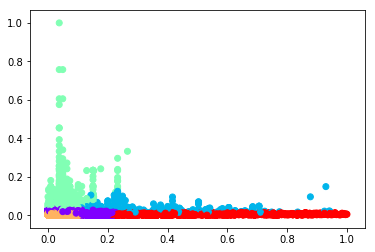

In [29]:
# Scatter plot of the normalized k-means clustering of points and price
plt.scatter(filtered_data.loc[:,'norm_province_id'], filtered_data.loc[:,'norm_price'], c=labels, cmap='rainbow')    
plt.show()

In [30]:
# Get top 3 varieties from each cluster formed
get_top_x_per_cluster(3, 'price', filtered_data, labels, n)

# Get top 3 vintage from each cluster formed
get_top_x_per_cluster(3, 'province', filtered_data, labels, n)

('\nTop', 3, 'price', 'in each cluster')
('\nCluster ', 0)
(50.0, 1831)
(60.0, 1246)
(45.0, 1151)
('\nCluster ', 1)
(60.0, 67)
(70.0, 49)
(80.0, 43)
('\nCluster ', 2)
(120.0, 166)
(150.0, 107)
(125.0, 96)
('\nCluster ', 3)
(20.0, 3912)
(15.0, 3772)
(25.0, 3045)
('\nCluster ', 4)
(20.0, 439)
(15.0, 343)
(25.0, 328)
('\nTop', 3, 'province', 'in each cluster')
('\nCluster ', 0)
('Tuscany', 1894)
('Piedmont', 1726)
('Washington', 1656)
('\nCluster ', 1)
('Port', 125)
('Wachau', 89)
('Rh\xc3\xb4ne Valley', 48)
('\nCluster ', 2)
('Burgundy', 441)
('Tuscany', 311)
('Piedmont', 227)
('\nCluster ', 3)
('Washington', 6804)
('Oregon', 3854)
('Bordeaux', 3381)
('\nCluster ', 4)
('D\xc3\xa3o', 275)
('Wachau', 215)
('Cachapoal Valley', 180)


# Analysis - GMM with Filtered Data without California Wines 

After applying GMM on a filtered dataset based on specific wine variety, we found that the California wine reviews skewed the data because there are a lot more reviews for California wines than those from other provinces. Therefore, we filtered our dataset to apply GMM on all reviews that were not California wines on the normalized vintage, normalized wine review points, normalized price, and normalized province id. 

The clusters showed that there is a relationship between price and province. For example, it showed that provinces such as Burgundy, Tuscany, and Piedmont had higher wine prices than some of the other provinces. Without the data of California wines impacting the clusters from the dataset, we gain insight about the relationship between price and province from the rest of our dataset.

In [31]:
# Retrieve Wine Enthusiast Point Rating and Price column from dataset

data.dropna(subset=['points','price'],inplace=True)
clustering_data = data.loc[:,['points','price']]
clustering_data.head()

,points,price
1,87,15.0
2,87,14.0
3,87,13.0
4,87,65.0
5,87,15.0


In [32]:
# Gathering normalized data to prepare for clustering
clustering_norm_data = data.loc[:,['norm_price','norm_points']]
clustering_norm_data.head()

,norm_price,norm_points
1,0.003333,0.07
2,0.003030,0.07
3,0.002727,0.07
4,0.018485,0.07
5,0.003333,0.07


In [33]:
# Through both graphs from the elbow curve, k=5 appears to be the elbow of the curve from our K-means analysis
# Using GMM clustering on dataset based on points and price for each wine.

n = 8

gmm = mixture.GaussianMixture(n_components=n, random_state = 0).fit(clustering_norm_data)
labels = gmm.predict(clustering_norm_data)

print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 14687, 1: 13323, 2: 25809, 3: 12202, 4: 1130, 5: 24312, 6: 20090, 7: 5038}


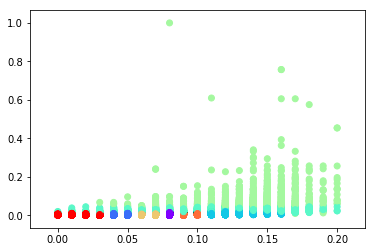

In [34]:
# Plotting results from k-means clustering based on points and price

plt.scatter(data.loc[:,'norm_points'], data.loc[:,'norm_price'], c=labels, cmap='rainbow')    
plt.show()

In [35]:
# Get top 3 points from each cluster formed
get_top_x_per_cluster(3, 'points', data, labels, n)

# Get top 3 price from each cluster formed
get_top_x_per_cluster(3, 'price', data, labels, n)

('\nTop', 3, 'points', 'in each cluster')
('\nCluster ', 0)
(88, 14687)
('\nCluster ', 1)
(85, 7889)
(84, 5434)
('\nCluster ', 2)
(91, 9151)
(92, 7337)
(93, 4557)
('\nCluster ', 3)
(89, 1484)
(90, 1374)
(92, 1257)
('\nCluster ', 4)
(94, 230)
(95, 216)
(93, 154)
('\nCluster ', 5)
(87, 13896)
(86, 10416)
('\nCluster ', 6)
(90, 10716)
(89, 9374)
('\nCluster ', 7)
(83, 2537)
(82, 1555)
(81, 601)
('\nTop', 3, 'price', 'in each cluster')
('\nCluster ', 0)
(20.0, 1224)
(25.0, 989)
(15.0, 948)
('\nCluster ', 1)
(10.0, 1279)
(15.0, 1175)
(12.0, 1124)
('\nCluster ', 2)
(50.0, 2120)
(60.0, 1597)
(40.0, 1459)
('\nCluster ', 3)
(75.0, 1005)
(80.0, 841)
(50.0, 763)
('\nCluster ', 4)
(200.0, 93)
(175.0, 79)
(250.0, 51)
('\nCluster ', 5)
(15.0, 2147)
(20.0, 1881)
(18.0, 1488)
('\nCluster ', 6)
(20.0, 1664)
(25.0, 1557)
(30.0, 1290)
('\nCluster ', 7)
(10.0, 543)
(12.0, 442)
(15.0, 424)


# Analysis - GMM with Normalized points and price
Here, we cluster based on the normalized points and price of the wine for all type of wine from any location. Here the clusters are relatively well defined. They all have prices and points that seem to be in a similar range. There is a relationship between the price of the wine and the rating, as shown by the clusters. We can observe here that more expensive wines generally have a higher rating than the cheaper wines. There seem to be a few outliers where some cheap wines have higher ratings and vice versa.

# Conclusion

In conclusion at this point in the project,We ran our dataset using the GMM algorithm on various subsets and features of the data to observe which clusters made the most sense. After running GMM on the entire dataset we realized that California made up a lot of the data data so when we clustered based on province, variety, and vintage we found that 6/8 clusters all had California. Then we ran it again on the normalized data for province, variety, and variety similarily here again we noticed that the clusters all contain California and Washington because the dataset has high volume for these two provinces. After multiple attempts, we realized we get more meaning out of the the data when we use every Province except California as California was skewing the data. When we ran GMM on the normalized province, vintage, price, and points we got well defined clusters. These clusters showed that there is a realtionship between price and province. 
we have run our data set through data cleaning, normalization, to allow us to run K_Means, Agglomerative, and GMM clustering techniques. Do to the size of the dataset we were un able to run agglomerative clustering. However, looking at the clusters from K_Means and GMM we have gained some valuable insites about our data that helped us refine our perception of the data and what the data is able to tell us. Especially using GMM we relized that our data was heavily biased. Our dataset has about 28% of all data from Califorina. We were hoping to build a recommendation system that could help recommend a new upstart wine maker, what to set the sale price of thier new wine. We were hoping that based on number of different factors such as vintage, type of grape, location we could reliabily recommend what price to set the wine. We realized that becomes an issue because of the bias of the dataset to California. Using clusers majority of our data shows up in a cluser associated with California. Do to this, we relized that is order to get a reliable recommendation for locations that do not have such a large collection of data points, we needed to minimize the amount of data we have from California. By doing this we were able to get a better clustering from locations with less datapoints. We also noticed that while trying to look for correlations in the dataset, we need to start looking for latent variables that are not explicity called out in our dataset. We are currently working on looking for a second dataset that we can use to enrich our current dataset to try and optimize and improve the clusters. Overall, using GMM clustering looking at normalized price and points, we have nice correlation between price and location, which is important for the recommendation system.